<a href="https://colab.research.google.com/github/Sourabh17042/Sourabh17042-Analysing-the-sales-data-with-sqlite/blob/main/Analysing_the_sales_data_with_sqlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import pandas as pd

In [ ]:
# Connect to SQLite database (or create one if it doesn't exist)
conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

# Create a sales table
cursor.execute('''CREATE TABLE IF NOT EXISTS sales_data (
                    id INTEGER PRIMARY KEY,
                    product TEXT,
                    category TEXT,
                    price REAL,
                    quantity INTEGER,
                    sale_date TEXT)''')

conn.commit()  # Save changes
print("✅ Database and Table Created Successfully!")

✅ Database and Table Created Successfully!


In [ ]:
sales_records = [
    (1, "Laptop", "Electronics", 900.50, 3, "2024-01-10"),
    (2, "Headpjones", "Electronics", 50.99, 5, "2024-01-12"),
    (3, "Office Chair", "Furniture", 120.75, 2, "2024-01-15"),
    (4, "Smartphone", "Electronics", 699.99, 4, "2024-02-01"),
    (5, "Table", "Furniture", 300.00, 1, "2024-02-03"),
]

cursor.executemany("INSERT INTO sales_data VALUES (?, ?, ?, ?, ?, ?)", sales_records)
conn.commit()
print("✅ Sample Sales Data Inserted!")

✅ Sample Sales Data Inserted!


In [ ]:
query = "SELECT * FROM sales_data"
df = pd.read_sql_query(query, conn)
print(df)

   id       product     category   price  quantity   sale_date
0   1        Laptop  Electronics  900.50         3  2024-01-10
1   2    Headpjones  Electronics   50.99         5  2024-01-12
2   3  Office Chair    Furniture  120.75         2  2024-01-15
3   4    Smartphone  Electronics  699.99         4  2024-02-01
4   5         Table    Furniture  300.00         1  2024-02-03


In [ ]:
total_revenue = pd.read_sql_query("SELECT SUM(price * quantity) AS total_sales FROM sales_data", conn) # Changed 'quauntity' to 'quantity'
print("💰 Total Sales Revenue: $", total_revenue['total_sales'][0])

💰 Total Sales Revenue: $ 6297.91


In [ ]:
best_category = pd.read_sql_query(
    "SELECT category, SUM(quantity) AS total_sold FROM sales_data GROUP BY category ORDER BY total_sold DESC LIMIT 1",
    conn
)
print("🏆 Best-Selling Category:\n", best_category)

🏆 Best-Selling Category:
       category  total_sold
0  Electronics          12


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


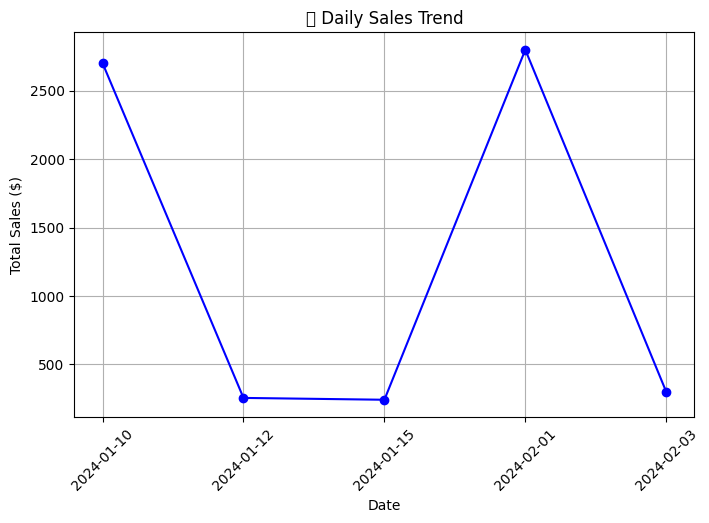

In [ ]:
import matplotlib.pyplot as plt

# Group sales by date
sales_trend = pd.read_sql_query(
    "SELECT sale_date, SUM(price * quantity) AS total_sales FROM sales_data GROUP BY sale_date",
    conn
)

# Plot sales trend
plt.figure(figsize=(8, 5))
plt.plot(sales_trend["sale_date"], sales_trend["total_sales"], marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("📈 Daily Sales Trend")
plt.xticks(rotation=45)
plt.grid()
plt.show()
